<html>
<body>

<h1>tutorial #1:</h1>
<p>creating a symmetrical and balanced winding</p>
<p><img src="figure/koil_01.jpg" width="300" align="left"/></p>
<br><br>
    
<p> Selected reference:<br>
    Luigi Alberti and  Nicola Bianchi
    <em>"Theory and Design of Fractional-Slot Multilayer Windings",</em> <br>
<em>IEEE Transactions on Industry Applications, </em>
2013<i>, Vol 49</i>, pp. 841-849,  <a href="https://ieeexplore.ieee.org/document/6417023">DOI:10.1109/TIA.2013.2242031</a>  </p>    
</body>
</html>

## Create a 12-slot 10-pole 3-phase winding

In [8]:
from dolomites import koil

w = koil.m_phase_winding()
m = 3   # number of phases
Q = 36  # number of slots
p = 2   # number of pole pairs

# let ask koil to compute the symmetrical and balanced winding
w.compute_winding(m,Q,p,single_layer=False)

## Post computations on the winding

In [9]:
# print the coils for each phase in the format
# coil(start,end,nc)

for _w in w.windings:
    print(_w.coils)

[coil (4, 13, 1), coil (5, 14, 1), coil (6, 15, 1), coil (22, 31, 1), coil (23, 32, 1), coil (24, 33, 1), coil (13, 22, -1), coil (14, 23, -1), coil (15, 24, -1), coil (31, 4, -1), coil (32, 5, -1), coil (33, 6, -1)]
[coil (10, 19, 1), coil (11, 20, 1), coil (12, 21, 1), coil (28, 1, 1), coil (29, 2, 1), coil (30, 3, 1), coil (1, 10, -1), coil (2, 11, -1), coil (3, 12, -1), coil (19, 28, -1), coil (20, 29, -1), coil (21, 30, -1)]
[coil (16, 25, 1), coil (17, 26, 1), coil (18, 27, 1), coil (34, 7, 1), coil (35, 8, 1), coil (36, 9, 1), coil (7, 16, -1), coil (8, 17, -1), coil (9, 18, -1), coil (25, 34, -1), coil (26, 35, -1), coil (27, 36, -1)]


In [10]:
# compute the winding factor for the main harmonic

for _w in w.windings:
    print(_w.get_kw())

0.9597950805239389
0.9597950805239389
0.9597950805239388


In [11]:
# compute the winding factors for other harmonics

for nu in range(1,12):
    print(nu,w.windings[0].get_kw(nu))

1 0
2 0.9597950805239389
3 0
4 0
5 0
6 0.6666666666666669
7 0
8 0
9 0
10 0.21756788155538043
11 0


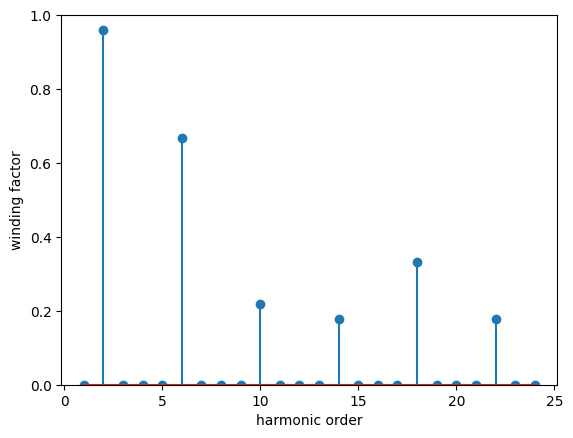

In [12]:
# make a histogram for the winding factors
# only one phase is considered
# let note that third harmoics are present in each phase

nu = []
kw = []
for _nu in range(1,25):
    nu.append(_nu)
    kw.append(w.windings[0].get_kw(_nu))

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.stem(nu,kw)
plt.ylim([0,1])
plt.xlabel('harmonic order')
plt.ylabel('winding factor');

## Get the slot matrix
The slot matrix is useful to describe the winding in finite element simulations

In [14]:
# internal representation with the actual number of conductors
# for each slot
import numpy as np
for _w in w.windings:
    print(_w.get_slot_matrix(normalize=True))
#    print(_w.get_slot_matrix(normalize=False))


[ 0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0. -1. -1. -1.  0.  0.  0.
  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0. -1. -1. -1.  0.  0.  0.]
[-1. -1. -1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.
 -1. -1. -1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0. -1. -1. -1.  0.  0.  0.  0.  0.  0.  1.  1.  1.
  0.  0.  0.  0.  0.  0. -1. -1. -1.  0.  0.  0.  0.  0.  0.  1.  1.  1.]


In [15]:
# we ask to have it in 'lua' syntax, useful for femm
# we normalize the number of conductors
# we use a custom name pattern

for i,_w in enumerate(w.windings):
    print(_w.get_slot_matrix('lua',name=chr(ord('a')+i)))   

ka = {0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0}
kb = {-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0}
kc = {0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0}


In [16]:
# we ask to have it in the syntax for getdp function

for i,_w in enumerate(w.windings):
    print(_w.get_slot_matrix('getdp',name=chr(ord('a')+i)))   

ka[#1001] = 0.0;
ka[#1002] = 0.0;
ka[#1003] = 0.0;
ka[#1004] = 1.0;
ka[#1005] = 1.0;
ka[#1006] = 1.0;
ka[#1007] = 0.0;
ka[#1008] = 0.0;
ka[#1009] = 0.0;
ka[#1010] = 0.0;
ka[#1011] = 0.0;
ka[#1012] = 0.0;
ka[#1013] = -1.0;
ka[#1014] = -1.0;
ka[#1015] = -1.0;
ka[#1016] = 0.0;
ka[#1017] = 0.0;
ka[#1018] = 0.0;
ka[#1019] = 0.0;
ka[#1020] = 0.0;
ka[#1021] = 0.0;
ka[#1022] = 1.0;
ka[#1023] = 1.0;
ka[#1024] = 1.0;
ka[#1025] = 0.0;
ka[#1026] = 0.0;
ka[#1027] = 0.0;
ka[#1028] = 0.0;
ka[#1029] = 0.0;
ka[#1030] = 0.0;
ka[#1031] = -1.0;
ka[#1032] = -1.0;
ka[#1033] = -1.0;
ka[#1034] = 0.0;
ka[#1035] = 0.0;
ka[#1036] = 0.0;

kb[#1001] = -1.0;
kb[#1002] = -1.0;
kb[#1003] = -1.0;
kb[#1004] = 0.0;
kb[#1005] = 0.0;
kb[#1006] = 0.0;
kb[#1007] = 0.0;
kb[#1008] = 0.0;
kb[#1009] = 0.0;
kb[#1010] = 1.0;
kb[#1011] = 1.0;
kb[#1012] = 1.0;
kb[#1013] = 0.0;
kb[#1014] = 0.0;
kb[#1015] = 0.0;
kb[#1016] = 0.0;
kb[#1017] = 0.0;
kb[#1018] = 0.0;
kb[#1019] = -1.0;
kb[#1020] = -1.0;
kb[#1021] = -1.0;
kb[#1022] = 0.0;
k

In [17]:
# when 2-layer windings are explicitly modeled with getdp
# we can ask to have the slot matrix in specific form

for i,_w in enumerate(w.windings):
    print(_w.get_slot_matrix('getdp-2l',name=chr(ord('a')+i)))   

ka[#1001] = 0.0; ka[#2001] = 0.0;
ka[#1002] = 0.0; ka[#2002] = 0.0;
ka[#1003] = 0.0; ka[#2003] = 0.0;
ka[#1004] = 0.5; ka[#2004] = 0.5;
ka[#1005] = 0.5; ka[#2005] = 0.5;
ka[#1006] = 0.5; ka[#2006] = 0.5;
ka[#1007] = 0.0; ka[#2007] = 0.0;
ka[#1008] = 0.0; ka[#2008] = 0.0;
ka[#1009] = 0.0; ka[#2009] = 0.0;
ka[#1010] = 0.0; ka[#2010] = 0.0;
ka[#1011] = 0.0; ka[#2011] = 0.0;
ka[#1012] = 0.0; ka[#2012] = 0.0;
ka[#1013] = -0.5; ka[#2013] = -0.5;
ka[#1014] = -0.5; ka[#2014] = -0.5;
ka[#1015] = -0.5; ka[#2015] = -0.5;
ka[#1016] = 0.0; ka[#2016] = 0.0;
ka[#1017] = 0.0; ka[#2017] = 0.0;
ka[#1018] = 0.0; ka[#2018] = 0.0;
ka[#1019] = 0.0; ka[#2019] = 0.0;
ka[#1020] = 0.0; ka[#2020] = 0.0;
ka[#1021] = 0.0; ka[#2021] = 0.0;
ka[#1022] = 0.5; ka[#2022] = 0.5;
ka[#1023] = 0.5; ka[#2023] = 0.5;
ka[#1024] = 0.5; ka[#2024] = 0.5;
ka[#1025] = 0.0; ka[#2025] = 0.0;
ka[#1026] = 0.0; ka[#2026] = 0.0;
ka[#1027] = 0.0; ka[#2027] = 0.0;
ka[#1028] = 0.0; ka[#2028] = 0.0;
ka[#1029] = 0.0; ka[#2029] = 0.0;
ka[#1030

In [18]:
# finally we can have it also in a matlab format

for i,_w in enumerate(w.windings):
    print(_w.get_slot_matrix('m-file',name=chr(ord('a')+i)))   

ka = [0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0];
kb = [-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0];
kc = [0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0];


In [19]:
# we can also ask koil to provide a circuit representation
# of the winding, suitable to be adopted in getdp simulations

print(w.windings[0].get_getdp_circuit(id=100,name='a'))
print(w.windings[1].get_getdp_circuit(id=200,name='b'))
print(w.windings[2].get_getdp_circuit(id=300,name='c'))

Case Circuit_a {
    {Region #1004; Branch {100,101};}
    {Region #2013; Branch {102,101};}
    {Region #1005; Branch {102,103};}
    {Region #2014; Branch {104,103};}
    {Region #1006; Branch {104,105};}
    {Region #2015; Branch {106,105};}
    {Region #1022; Branch {106,107};}
    {Region #2031; Branch {108,107};}
    {Region #1023; Branch {108,109};}
    {Region #2032; Branch {110,109};}
    {Region #1024; Branch {110,111};}
    {Region #2033; Branch {112,111};}
    {Region #2022; Branch {112,113};}
    {Region #1013; Branch {114,113};}
    {Region #2023; Branch {114,115};}
    {Region #1014; Branch {116,115};}
    {Region #2024; Branch {116,117};}
    {Region #1015; Branch {118,117};}
    {Region #2004; Branch {118,119};}
    {Region #1031; Branch {120,119};}
    {Region #2005; Branch {120,121};}
    {Region #1032; Branch {122,121};}
    {Region #2006; Branch {122,123};}
    {Region #1033; Branch {124,123};}
    {Region #Ga; Branch {100,124};}
    }

Case Circuit_b {
    {Region

## Consider a single layer winding

In [20]:
# we can ask, when feasible, to produce a single layer winding
w_1l = koil.m_phase_winding()
w_1l.compute_winding(m,Q,p,single_layer=True)

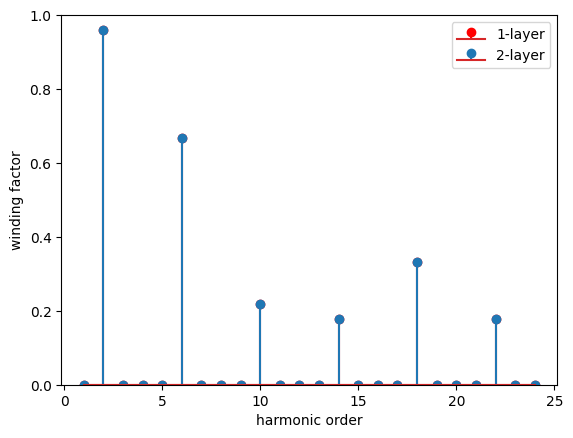

In [21]:
# we can now compare winding factors of 1- and 2-layer windings

kw_1l = []
for _nu in nu:
    kw_1l.append(w_1l.windings[0].get_kw(_nu))

fig, ax = plt.subplots()
ax.stem(nu,kw_1l,'ro',markerfmt='ro',label='1-layer')
ax.stem(nu,kw,label='2-layer')
plt.ylim([0,1])
ax.legend()
plt.xlabel('harmonic order')
plt.ylabel('winding factor');


## Inspect and plot the star of slots


In [22]:
w.star


              Sos: (m: 3, Q: 36, p: 2, t: 2, yq: 9)
              Spokes: [Spoke 1: angle 10.0, Spoke 2: angle 29.999999999999996, Spoke 3: angle 50.0, Spoke 4: angle 70.0, Spoke 5: angle 90.0, Spoke 6: angle 110.0, Spoke 7: angle 129.99999999999997, Spoke 8: angle 149.99999999999997, Spoke 9: angle 170.0, Spoke 10: angle 190.0, Spoke 11: angle 209.99999999999997, Spoke 12: angle 229.99999999999997, Spoke 13: angle 249.99999999999997, Spoke 14: angle 270.0, Spoke 15: angle 290.0, Spoke 16: angle 310.0, Spoke 17: angle 329.99999999999994, Spoke 18: angle 349.99999999999994, Spoke 19: angle 9.99999999999999, Spoke 20: angle 29.999999999999964, Spoke 21: angle 49.99999999999999, Spoke 22: angle 69.99999999999997, Spoke 23: angle 90.0, Spoke 24: angle 109.99999999999997, Spoke 25: angle 129.99999999999994, Spoke 26: angle 149.99999999999991, Spoke 27: angle 170.0, Spoke 28: angle 190.0, Spoke 29: angle 209.99999999999997, Spoke 30: angle 229.99999999999994, Spoke 31: angle 250.00000000000

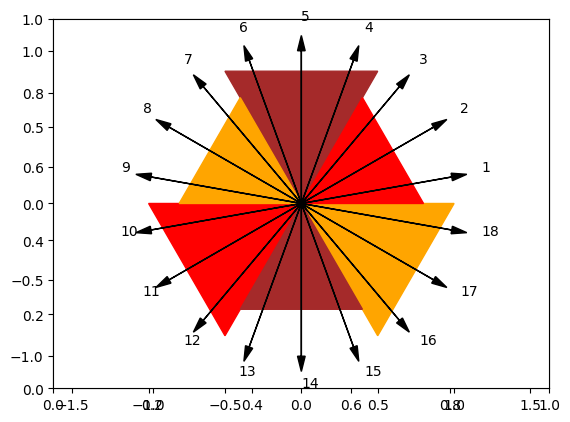

In [23]:
w.star.plot()


In [24]:
# let print the coils again to check correspndance with the sos

for _w in w.windings:
    print(_w.coils)

[coil (4, 13, 1), coil (5, 14, 1), coil (6, 15, 1), coil (22, 31, 1), coil (23, 32, 1), coil (24, 33, 1), coil (13, 22, -1), coil (14, 23, -1), coil (15, 24, -1), coil (31, 4, -1), coil (32, 5, -1), coil (33, 6, -1)]
[coil (10, 19, 1), coil (11, 20, 1), coil (12, 21, 1), coil (28, 1, 1), coil (29, 2, 1), coil (30, 3, 1), coil (1, 10, -1), coil (2, 11, -1), coil (3, 12, -1), coil (19, 28, -1), coil (20, 29, -1), coil (21, 30, -1)]
[coil (16, 25, 1), coil (17, 26, 1), coil (18, 27, 1), coil (34, 7, 1), coil (35, 8, 1), coil (36, 9, 1), coil (7, 16, -1), coil (8, 17, -1), coil (9, 18, -1), coil (25, 34, -1), coil (26, 35, -1), coil (27, 36, -1)]


In [25]:
w.star




              Sos: (m: 3, Q: 36, p: 2, t: 2, yq: 9)
              Spokes: [Spoke 1: angle 10.0, Spoke 2: angle 29.999999999999996, Spoke 3: angle 50.0, Spoke 4: angle 70.0, Spoke 5: angle 90.0, Spoke 6: angle 110.0, Spoke 7: angle 129.99999999999997, Spoke 8: angle 149.99999999999997, Spoke 9: angle 170.0, Spoke 10: angle 190.0, Spoke 11: angle 209.99999999999997, Spoke 12: angle 229.99999999999997, Spoke 13: angle 249.99999999999997, Spoke 14: angle 270.0, Spoke 15: angle 290.0, Spoke 16: angle 310.0, Spoke 17: angle 329.99999999999994, Spoke 18: angle 349.99999999999994, Spoke 19: angle 9.99999999999999, Spoke 20: angle 29.999999999999964, Spoke 21: angle 49.99999999999999, Spoke 22: angle 69.99999999999997, Spoke 23: angle 90.0, Spoke 24: angle 109.99999999999997, Spoke 25: angle 129.99999999999994, Spoke 26: angle 149.99999999999991, Spoke 27: angle 170.0, Spoke 28: angle 190.0, Spoke 29: angle 209.99999999999997, Spoke 30: angle 229.99999999999994, Spoke 31: angle 250.00000000000

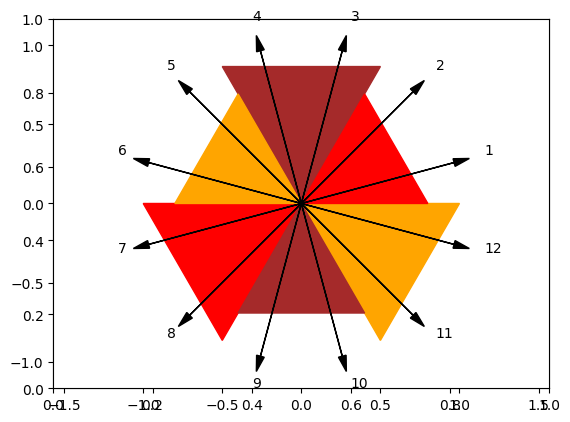

In [26]:
from dolomites import koil

w = koil.m_phase_winding()
m = 3   # number of phases
Q = 24  # number of slots
p = 2  # number of pole pairs

# let ask koil to compute the symmetrical and balanced winding
w.compute_winding(m,Q,p,single_layer=False)
w.star.plot()

In [27]:
# let print the coils again to check correspndance with the sos

for _w in w.windings:
    print(_w.coils)

[coil (3, 9, 1), coil (4, 10, 1), coil (15, 21, 1), coil (16, 22, 1), coil (9, 15, -1), coil (10, 16, -1), coil (21, 3, -1), coil (22, 4, -1)]
[coil (7, 13, 1), coil (8, 14, 1), coil (19, 1, 1), coil (20, 2, 1), coil (1, 7, -1), coil (2, 8, -1), coil (13, 19, -1), coil (14, 20, -1)]
[coil (11, 17, 1), coil (12, 18, 1), coil (23, 5, 1), coil (24, 6, 1), coil (5, 11, -1), coil (6, 12, -1), coil (17, 23, -1), coil (18, 24, -1)]
